In [86]:
import pandas as pd
df = pd.read_csv("Bangalore_1Day_NETC.csv")

In [87]:
df.head()

,SlNo.,merchant_name,direction,lane,tag_id,vehicle_regn_number,txn_amount,initiated_time,inn_rr_time_sec,vehicle_class_code,vehicle_comvehicle,geocode,merchant_sub_type,city,state
0,1,Bannerghatta Road (P2) Plaza,S,P2BX2,HXYUH,YFUNB,225,00-01-1900 21:54,994,VC4,F,"12.850056,77.588333",State,Bengaluru,Karnataka
1,2,Bannerghatta Road (P2) Plaza,S,P2BX2,JGEFQ,GQHLZ,225,00-01-1900 18:59,4528,VC20,T,"12.850056,77.588333",State,Bengaluru,Karnataka
2,3,Bannerghatta Road (P2) Plaza,S,P2BX2,VOAPH,DNTMI,150,00-01-1900 00:14,134,VC5,F,"12.850056,77.588333",State,Bengaluru,Karnataka
3,4,Kadathanamale Toll Plaza,S,LANE09,XBANK,ZMAOY,35,00-01-1900 18:19,80,VC20,F,"13.2123515,77.5535138",state,Bangalore,Karnataka
4,5,Kadathanamale Toll Plaza,S,LANE10,HMWDZ,IDSRZ,20,00-01-1900 15:03,64,VC4,F,"13.2123515,77.5535138",state,Bangalore,Karnataka


In [88]:
df['initiated_time'] = df['initiated_time'].astype(str).str.replace('00-01-1900', '').str.strip()

# 2. Convert the cleaned time string to datetime (time only)
df['initiated_time'] = pd.to_datetime(df['initiated_time'], format='%H:%M')
print(df[['initiated_time']].head())
print(f"\nData type after conversion: {df['initiated_time'].dtype}")

       initiated_time
0 1900-01-01 21:54:00
1 1900-01-01 18:59:00
2 1900-01-01 00:14:00
3 1900-01-01 18:19:00
4 1900-01-01 15:03:00

Data type after conversion: datetime64[ns]


In [89]:
# 1. Parsing and fixing 'initiated_time'

# 2. Standardizing categorical columns
df['merchant_sub_type'] = df['merchant_sub_type'].str.strip().str.capitalize()
df['city'] = df['city'].str.strip().str.title()

df['hour'] = df['initiated_time'].dt.strftime("%H")
df['minute'] = df['initiated_time'].dt.strftime("%M")

# 5. Removing duplicates
df.drop_duplicates(inplace=True)

# 6. Checking for missing values after preprocessing
missing_values = df.isnull().sum()

# Display cleaned data sample and missing values summary
print(df.head())
print("\nMissing values per column:\n", missing_values)


   SlNo.                 merchant_name direction    lane tag_id  \
0      1  Bannerghatta Road (P2) Plaza         S   P2BX2  HXYUH   
1      2  Bannerghatta Road (P2) Plaza         S   P2BX2  JGEFQ   
2      3  Bannerghatta Road (P2) Plaza         S   P2BX2  VOAPH   
3      4      Kadathanamale Toll Plaza         S  LANE09  XBANK   
4      5      Kadathanamale Toll Plaza         S  LANE10  HMWDZ   

  vehicle_regn_number  txn_amount      initiated_time  inn_rr_time_sec  \
0               YFUNB         225 1900-01-01 21:54:00              994   
1               GQHLZ         225 1900-01-01 18:59:00             4528   
2               DNTMI         150 1900-01-01 00:14:00              134   
3               ZMAOY          35 1900-01-01 18:19:00               80   
4               IDSRZ          20 1900-01-01 15:03:00               64   

  vehicle_class_code vehicle_comvehicle                geocode  \
0                VC4                  F    12.850056,77.588333   
1               VC20

<ipython-input-90-04ae5722d385>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette='viridis')


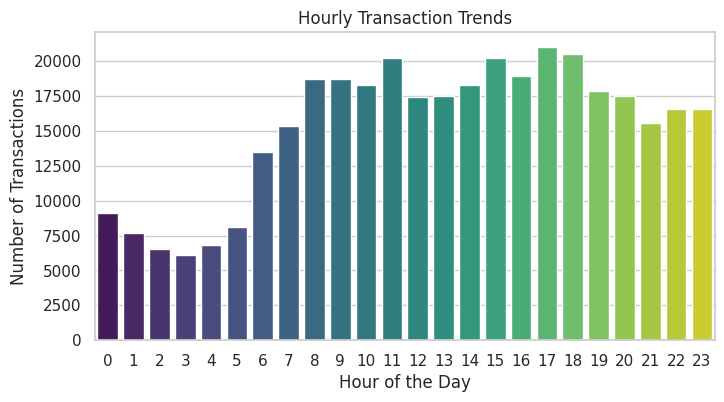

<ipython-input-90-04ae5722d385>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_merchants.values, y=top_merchants.index, palette='coolwarm')


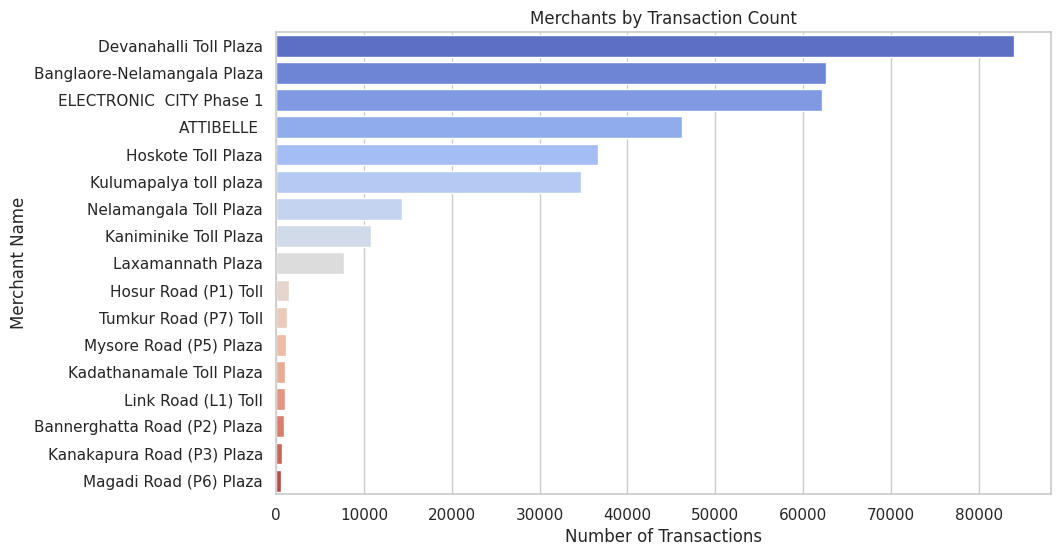

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,6)

# Preprocessing (basic)
df['merchant_sub_type'] = df['merchant_sub_type'].str.strip().str.capitalize()
df['city'] = df['city'].str.strip().str.title()
df[['latitude', 'longitude']] = df['geocode'].str.split(',', expand=True)
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df['hour'] = pd.to_datetime(df['initiated_time'], format='%d-%m-%Y %H:%M', errors='coerce').dt.hour


# 2. Hourly Transaction Trends
plt.figure(figsize=(8, 4))
sns.countplot(x='hour', data=df, palette='viridis')
plt.title('Hourly Transaction Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()



# 4. Transactions per Merchant
top_merchants = df['merchant_name'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=top_merchants.values, y=top_merchants.index, palette='coolwarm')
plt.title('Merchants by Transaction Count')
plt.xlabel('Number of Transactions')
plt.ylabel('Merchant Name')
plt.show()

In [91]:
df_hoskote = df[(df['merchant_name']== 'Hoskote Toll Plaza')]

In [92]:
df_hoskote.head()

,SlNo.,merchant_name,direction,lane,tag_id,vehicle_regn_number,txn_amount,initiated_time,inn_rr_time_sec,vehicle_class_code,vehicle_comvehicle,geocode,merchant_sub_type,city,state,hour,minute,latitude,longitude
241357,241358,Hoskote Toll Plaza,N,Lane1,EJBIV,YVMZG,10,1900-01-01 18:31:00,274,VC4,F,"13.059436,77.770734",National,Bangalore Rural,Karnataka,18,31,13.059436,77.770734
241358,241359,Hoskote Toll Plaza,N,Lane1,BDXMU,JYRGR,10,1900-01-01 16:43:00,301,VC20,T,"13.059436,77.770734",National,Bangalore Rural,Karnataka,16,43,13.059436,77.770734
241359,241360,Hoskote Toll Plaza,N,Lane4,EGYVP,JKGEO,10,1900-01-01 22:36:00,251,VC4,F,"13.059436,77.770734",National,Bangalore Rural,Karnataka,22,36,13.059436,77.770734
241360,241361,Hoskote Toll Plaza,S,Lane7,PAJUF,HLSZP,10,1900-01-01 17:25:00,306,VC4,F,"13.059436,77.770734",National,Bangalore Rural,Karnataka,17,25,13.059436,77.770734
241362,241363,Hoskote Toll Plaza,N,Lane2,CSYYI,BWOGH,25,1900-01-01 11:58:00,244,VC4,F,"13.059436,77.770734",National,Bangalore Rural,Karnataka,11,58,13.059436,77.770734


In [93]:
df_hoskote['lane'].unique()

array(['Lane1', 'Lane4', 'Lane7', 'Lane2', 'Lane5', 'L1', 'Lane11',
       'Lane9', 'Lane12', 'Lane10', 'Lane3', 'Lane6', 'Lane8', 'Lane13'],
      dtype=object)

<ipython-input-94-abab6a7ce801>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_directions))
<ipython-input-94-abab6a7ce801>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df_hoskote, palette='viridis')


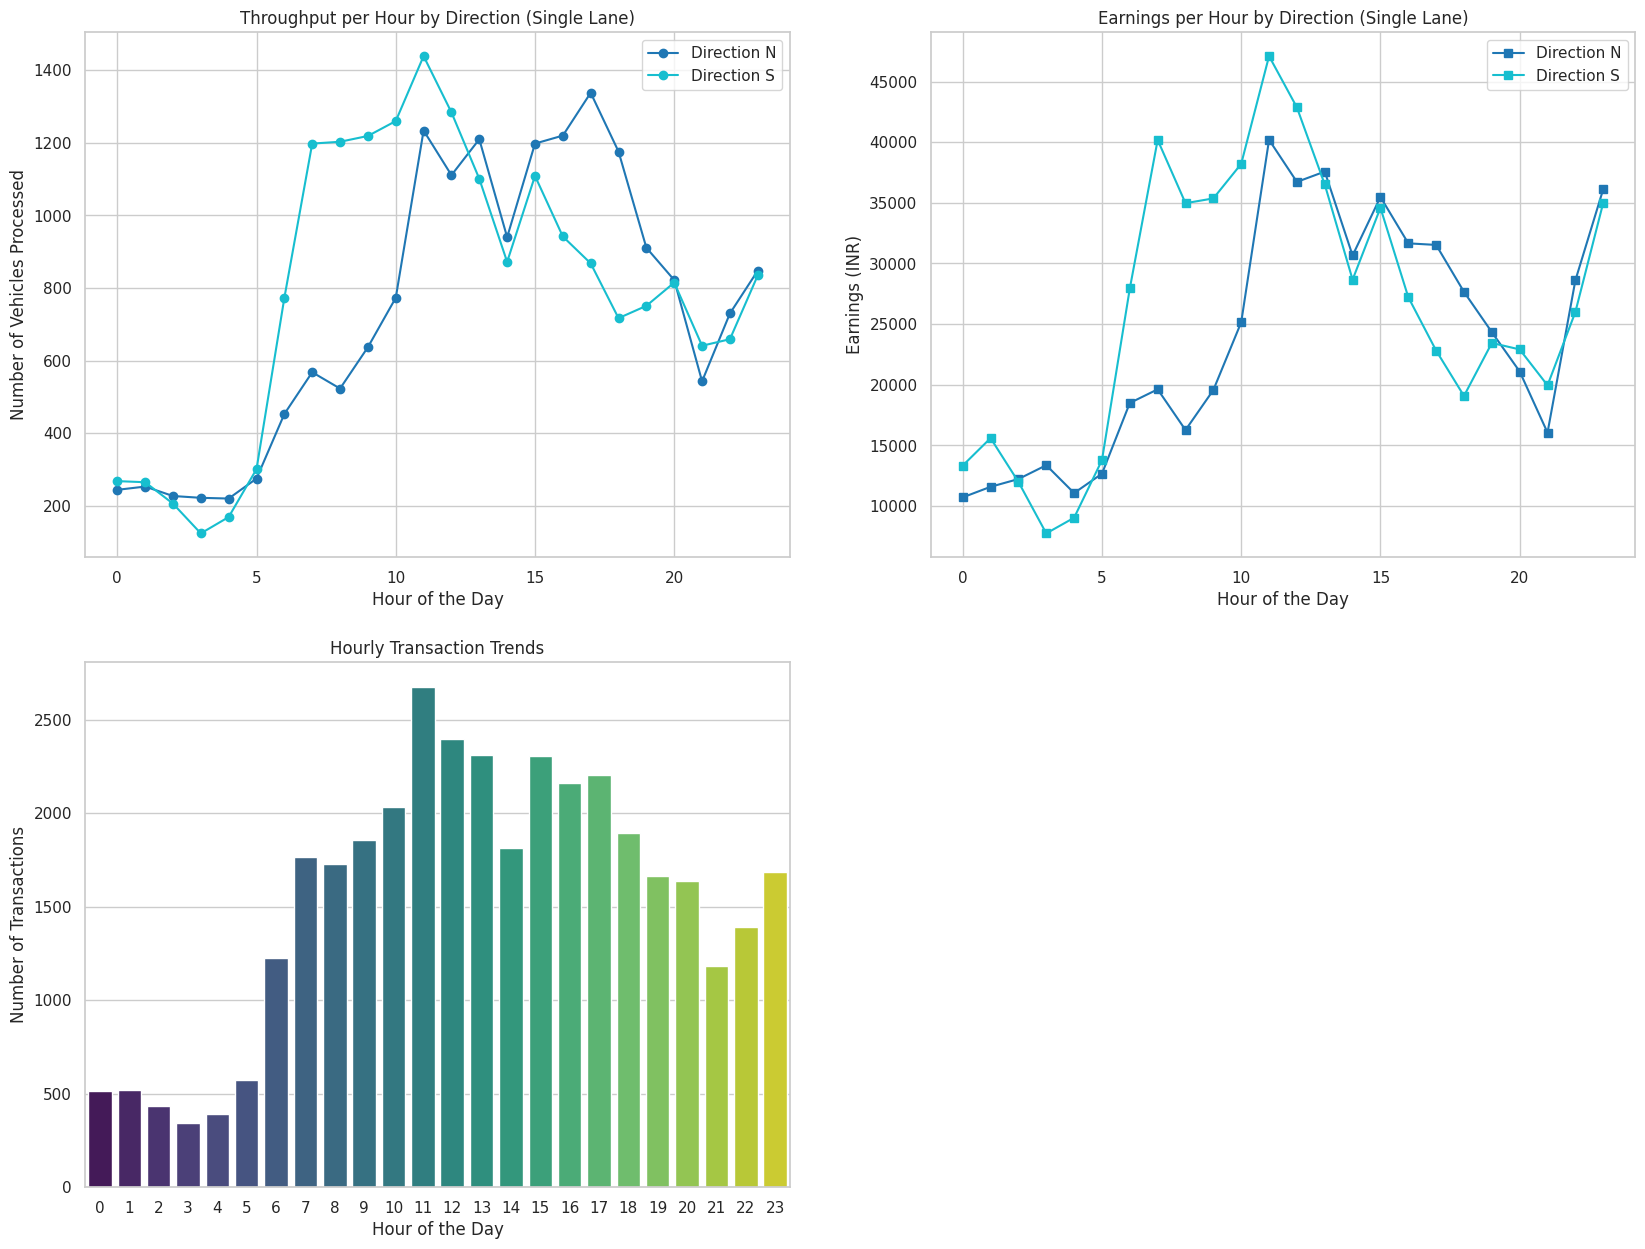

<Figure size 800x600 with 0 Axes>

In [94]:
throughput_per_hour_direction = df_hoskote.groupby(['hour', 'direction']).size().reset_index(name='throughput')
earnings_per_hour_direction = df_hoskote.groupby(['hour', 'direction'])['txn_amount'].sum().reset_index(name='earnings')

# 3. Merge throughput and earnings data
hourly_metrics_direction = pd.merge(throughput_per_hour_direction, earnings_per_hour_direction, on=['hour', 'direction'])

# 4. Visualization
unique_directions = hourly_metrics_direction['direction'].unique()
colors = plt.cm.get_cmap('tab10', len(unique_directions))

plt.figure(figsize=(20, 15))


# Throughput per hour by direction
plt.subplot(2, 2, 1)
for i, direction in enumerate(unique_directions):
    data = hourly_metrics_direction[hourly_metrics_direction['direction'] == direction]
    plt.plot(data['hour'], data['throughput'], marker='o', label=f'Direction {direction}', color=colors(i))
plt.title('Throughput per Hour by Direction (Single Lane)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Vehicles Processed')
plt.legend()

# Earnings per hour by direction
plt.subplot(2, 2, 2)
for i, direction in enumerate(unique_directions):
    data = hourly_metrics_direction[hourly_metrics_direction['direction'] == direction]
    plt.plot(data['hour'], data['earnings'], marker='s', label=f'Direction {direction}', color=colors(i))
plt.title('Earnings per Hour by Direction (Single Lane)')
plt.xlabel('Hour of the Day')
plt.ylabel('Earnings (INR)')
plt.legend()

plt.subplot(2,2,3)
sns.countplot(x='hour', data=df_hoskote, palette='viridis')
plt.title('Hourly Transaction Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()
plt.tight_layout()
plt.show()

# Display summary
# print(hourly_metrics_direction)



<ipython-input-95-417e75538390>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df_hoskote, palette='viridis')


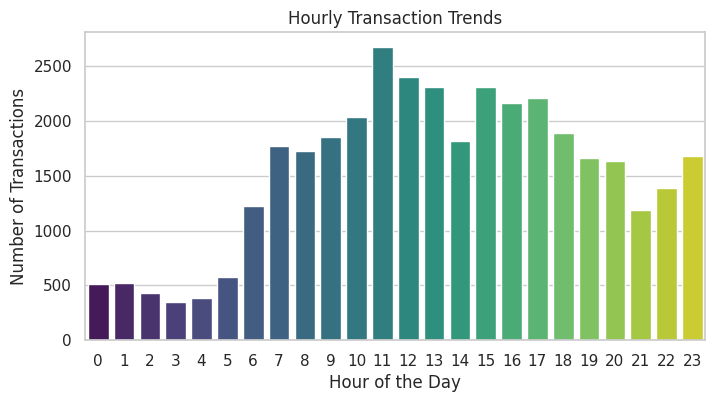

In [95]:
plt.figure(figsize=(8, 4))
sns.countplot(x='hour', data=df_hoskote, palette='viridis')
plt.title('Hourly Transaction Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class TollQueueModel:
    def __init__(self, df):
        self.df = df

    def calculate_metrics_per_lane(self):
        lanes = self.df['lane'].unique()
        self.metrics = {}

        for lane in lanes:
            lane_df = self.df[self.df['lane'] == lane]
            throughput_per_hour = lane_df.groupby('hour').size()
            revenue_per_hour = lane_df.groupby('hour')['txn_amount'].sum()

            lane_df = lane_df.sort_values('initiated_time')
            lane_df['inter_arrival_time'] = lane_df['initiated_time'].diff().dt.total_seconds().fillna(0)

            # Check and handle zero values in arrival_rate_per_hour
            arrival_rate_per_hour = throughput_per_hour / 3600
            arrival_rate_per_hour = arrival_rate_per_hour.replace(0, np.nan)

            # Handle zero or NaN service times to prevent division errors
            mean_service_time = lane_df.groupby('hour')['inn_rr_time_sec'].mean()
            mean_service_time = mean_service_time.replace(0, np.nan)
            service_rate_per_hour = 1 / mean_service_time

            utilization = arrival_rate_per_hour / service_rate_per_hour
            utilization[(utilization >= 1) | (utilization.isna())] = np.nan  # Handle invalid cases

            avg_queue_length = (utilization ** 2 / (1 - utilization)).fillna(0)
            avg_waiting_time = (avg_queue_length / arrival_rate_per_hour).fillna(0)

            self.metrics[lane] = {
                'throughput_per_hour': throughput_per_hour,
                'revenue_per_hour': revenue_per_hour,
                'utilization': utilization,
                'avg_queue_length': avg_queue_length,
                'avg_waiting_time': avg_waiting_time
            }

    def visualize_lane_metrics(self, lane):
        if lane not in self.metrics:
            print(f"Lane {lane} not found.")
            return

        metrics = self.metrics[lane]
        fig, axs = plt.subplots(3, 1, figsize=(12, 15))

        axs[0].bar(metrics['utilization'].index, metrics['utilization'].values, color='skyblue')
        axs[0].set_title(f'Hourly Utilization (ρ) - Lane {lane}')
        axs[0].set_ylabel('Utilization')
        axs[0].set_xlabel('Hour of the Day')
        axs[0].grid()

        axs[1].bar(metrics['avg_queue_length'].index, metrics['avg_queue_length'].values, color='orange')
        axs[1].set_title(f'Average Queue Length (Lq) per Hour - Lane {lane}')
        axs[1].set_ylabel('Average Queue Length')
        axs[1].set_xlabel('Hour of the Day')
        axs[1].grid()

        axs[2].bar(metrics['avg_waiting_time'].index, metrics['avg_waiting_time'].values, color='green')
        axs[2].set_title(f'Average Waiting Time (Wq) per Hour (seconds) - Lane {lane}')
        axs[2].set_ylabel('Average Waiting Time (s)')
        axs[2].set_xlabel('Hour of the Day')
        axs[2].grid()

        plt.tight_layout()
        plt.show()

    def print_summary(self):
        for lane, metrics in self.metrics.items():
            total_throughput = metrics['throughput_per_hour'].sum()
            total_revenue = metrics['revenue_per_hour'].sum()
            print(f"\n=== Lane {lane} Summary ===")
            print(f"Total throughput for the day: {total_throughput} vehicles")
            print(f"Total revenue for the day: INR {total_revenue:.2f}")
            # print("Queueing Model Performance Metrics:")
            # print(metrics['utilization'].describe().to_string())
            # print("Average Waiting Time (seconds) per hour:")
            # print(metrics['avg_waiting_time'].round(2))

# Example usage:
# Assuming df_hoskote is preprocessed and available
toll_model = TollQueueModel(df_hoskote)
toll_model.calculate_metrics_per_lane()
toll_model.print_summary()

# Visualize for a specific lane (replace 'Lane_1' with an actual lane value)
# toll_model.visualize_lane_metrics('Lane_1')



=== Lane Lane1 Summary ===
Total throughput for the day: 1641 vehicles
Total revenue for the day: INR 51690.00

=== Lane Lane4 Summary ===
Total throughput for the day: 3724 vehicles
Total revenue for the day: INR 133770.00

=== Lane Lane7 Summary ===
Total throughput for the day: 3605 vehicles
Total revenue for the day: INR 93998.00

=== Lane Lane2 Summary ===
Total throughput for the day: 2266 vehicles
Total revenue for the day: INR 73990.00

=== Lane Lane5 Summary ===
Total throughput for the day: 4113 vehicles
Total revenue for the day: INR 135660.00

=== Lane L1 Summary ===
Total throughput for the day: 73 vehicles
Total revenue for the day: INR 3135.00

=== Lane Lane11 Summary ===
Total throughput for the day: 2335 vehicles
Total revenue for the day: INR 75655.00

=== Lane Lane9 Summary ===
Total throughput for the day: 3311 vehicles
Total revenue for the day: INR 124080.00

=== Lane Lane12 Summary ===
Total throughput for the day: 1586 vehicles
Total revenue for the day: INR 52